<a href="https://colab.research.google.com/github/pipeluif28/DataSet_curso/blob/main/Copia_de_Fase_1_Precios_de_Airbnb_en_la_ciudad_de_New_York_Estudiantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cree una copia de este Notebook en su Drive y desarrolle el taller sobre ese documento copia. Para crear la copia debe dar click en el botón **Copiar en Drive** ubicado en el panel superior, se abrirá un nuevo notebook que podrá manipular a su antojo y que se almacenará en su Drive dentro de la Carpeta *Colab Notebooks*.

<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>



# **Predicción del precio de hospedajes en Airbnb para la ciudad de Nueva York**

**Contexto:** Airbnb es una empresa que ofrece una plataforma de software dedicada a la oferta de alojamientos particulares y turísticos mediante la cual los anfitriones pueden publicitar y contratar el arriendo de sus propiedades con sus huéspedes; anfitriones y huéspedes pueden valorarse mutuamente, como referencia para futuros usuarios. Muchos nuevos anfitriones no cuentan con información global de tendencias del mercado por lo que sus precios no son óptimos. Airbnb gana una comisión por cada arrendamiento, por lo tanto, está interesado en que sus anfitriones cobren una tarifa óptima de acuerdo a las características del hospedaje. Si los anfitriones ganan más… Airbnb también.

**Problema de Negocio:** La empresa Airbnb lo ha contratado para desarrollar un análisis descriptivo y exploratorio que permita responder la siguiente pregunta: ¿Cuál es la variable o característica más relevante para determinar el precio de un hospedaje en Airbnb?

**Sistema de información:** El conjunto de datos objetivo posee información acerca de 30.000 hospedajes de la plataforma Airbnb en la ciudad de Nueva York. Los datos a usar son datos públicos creados por Inside Airbnb, para más información puede consultar [aquí]( http://insideairbnb.com/get-the-data/).


## Indicaciones para resolver el Taller

El objetivo de este taller es que usted pueda desarrollar un análisis exploratorio completo del dataset propuesto. Para ello tendrá que programar, investigar y analizar todos los resultados que vaya obteniendo. Tenga en cuenta las siguientes indicaciones:

* Puede visualizar los resultados esperados en la mayoría de ejercicios, use esto como una guía, no es un requisito.
* Añada comentarios al código para que documente sus soluciones. 
* **Coloque su análisis en una celda de Texto luego de cada resultado.**
* Para resolver un ejercicio puede usar tantas celdas de Código o Texto como requiera.

Si se le presenta un error de código o duda. Siga los siguientes pasos:
1. Lea y entienda el error, para ello puede buscar en la documentación de la librería o googlearlo
2. Intente resolverlo
3. Comuníquese con el expero temático usando el Foro, recuerde enviar un pantallazo del error y mencionar que Ejercicio está solucionando. **Abstengase de compartir el link de su Notebook en el Foro.**



A continuación, se listan algunos recursos que pueden ser valiosos para su análisis.
* En esta página puede encontrar las gráficas que se pueden construir dependiendo de las variables disponibles, una breve explicación de cada gráfica y código para construir cada visualización. https://www.data-to-viz.com/
* Documentación de Pandas. https://pandas.pydata.org/docs/index.html
* Documentación de Seaborn. https://seaborn.pydata.org/index.html
* Documentación de Folium. https://python-visualization.github.io/folium/

## Cargar las librerías necesarias

A continuación vamos a cargar las librerías necesarias para el desarrollo de este caso.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt # submodulo de matplotlib
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn',sns.__version__)

Python 3.7.13
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Seaborn 0.11.2


Este caso de uso fue creado con las siguientes versiones:

```
Python 3.7.13
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Seaborn 0.11.2
```



## Cargar el dataset de trabajo

In [2]:
pd.options.display.max_columns = 100 # Permite visualizar todas las columnas del dataframe

airbnb = pd.read_csv('https://github.com/HarryVargas96/UdeCataluna/blob/main/data/airbnb.csv?raw=true', delimiter=',')

airbnb.head(3)

,id,name,transit,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Very close to F and G trains and Express bus i...,2787,39698.0,within an hour,1.0,0.0,6.0,1.0,"Brooklyn , NY, United States",Brooklyn,40.64749,-73.97237,Apartment,Private room,2,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",149,1,35,1,3 weeks ago,1,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,6,0,5,1,0.21,1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,4632,39777.0,within a day,1.0,0.0,1.0,1.0,"New York, NY, United States",Harlem,40.80902,-73.94190,Apartment,Private room,2,1.0,1,1,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",150,2,20,3,34 months ago,1,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,1,0,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,17985,39953.0,within a day,1.0,0.0,2.0,1.0,"New York, NY, United States",Harlem,40.79685,-73.94872,Apartment,Entire home/apt,4,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",190,1,0,7,7 weeks ago,1,4,14,14,249,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,2,1,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1


In [5]:
# Dimensiones del dataframe
airbnb.shape

(30179, 76)

In [6]:
# Resumen de las variables del dataframe
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   name                                          30166 non-null  object 
 2   transit                                       18190 non-null  object 
 3   host_id                                       30179 non-null  int64  
 4   host_since                                    30170 non-null  float64
 5   host_response_time                            17082 non-null  object 
 6   host_response_rate                            17082 non-null  float64
 7   host_is_superhost                             30170 non-null  float64
 8   host_listings_count                           30170 non-null  float64
 9   host_identity_verified                        30170 non-null 

## Análisis Univariado

### Ejercicio 1

Como puede observar en el resumen anterior, el dataframe airbnb tiene 76 columnas. 
Haga la detección de las variables listadas a continuación, siga la tabla de ejemplo.

* price
* latitud
* longitud
* host_is_superhost
* neighbourhood
* property_type
* room_types
* bathrooms
* bedrooms
* number_of_reviews
* reviews_per_month
* parking

[Aquí](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing) encontrará el diccionario de Datos para el conjunto de datos de trabajo.

Nota: Puede encontrar variables que estén representadas por números, sin embargo, su tipología es cualitativa o categórica.

Respuesta:

|Nombre de la variable|Descripción|Tipología estadística|Tipología computacional|
|---|---|---|---|
|price|Precio diario en dólares|Cuantitativa continua|int|
|latitude|Latitud basado en World Geodetic System|Cuantitativa continua|float|
|longitude|Latitud basado en World Geodetic System|Cuantitativa continua|float|
|host_is_superhost|Superanfrition|Cualitativa Binaria|bolean|
|neighbourhood|Barrio|Cualitativa Nominal|string|
|property_type|Tipo de Propiedad|Cuantitativa continua|string|
|room_types|Tipo de Hospedajes|Cuantitativa continua|string|
|bathrooms|Cantidad de Baños|Cuantitativa discreta|float|
|bedrooms|Cantidad de Habitaciones|Cuantitativa discreta|int|
|number_of_reviews|Numero de Reseñas|Cuantitativa discreta|float|
|reviews_per_month|Reseñas por mes|Cuantitativa Discreta|float|
|parking|Si tiene o no tiene parqueadero|Cualitativa Binaria|int|



### Ejercicio 2

Obtenga un resumen estadístico para las variables: price, bedrooms, bathrooms latitude y longitude. Haga un corto análisis de sus hallazgos. ¿Cuál es el rango de cada variable? ¿La distribución de la variable es simétrica? ¿Hay atípicos? ¿Los valores son lógicos en el contexto del negocio?



<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>



* Filtre las 5 variables, obtendrá un dataframe solo con esas columnas.
* Aplique el método `describe()`

In [7]:
#@title Resumen estadistico Respuesta
#filtramos las 5 colunmnas
airbnb2 = airbnb[["price","bedrooms","bathrooms","latitude","longitude"]]
#
airbnb2.describe() # aplicamos el metodo describe()




,price,bedrooms,bathrooms,latitude,longitude
count,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000
mean,132.949965,1.265516,1.151595,40.728593,-73.952292
std,93.151824,0.614659,0.422225,0.054541,0.044117
min,0.000000,1.000000,0.500000,40.499790,-74.244420
25%,65.000000,1.000000,1.000000,40.690720,-73.982085
50%,100.000000,1.000000,1.000000,40.721450,-73.955280
75%,175.000000,1.000000,1.000000,40.762790,-73.936435
max,500.000000,11.000000,7.500000,40.913060,-73.716900


In [8]:
#@title
airbnb.describe(include = 'object')

,name,transit,host_response_time,street,neighbourhood,property_type,room_type,bed_type,amenities,calendar_updated,cancellation_policy
count,30166,18190,17082,30179,30170,30179,30179,30179,30179,30179,30179
unique,29611,16234,4,214,186,33,3,5,27183,90,5
top,Hillside Hotel,The property is conveniently located thirty mi...,within an hour,"New York, NY, United States",Brooklyn,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",today,strict_14_with_grace_period
freq,18,36,8872,13146,7024,24538,15101,29772,129,3203,12139


In [9]:
#@title Codigo Punto  2
print('el valor minimo es: us$',airbnb['price'].min(),)
print('el valor Maximo de una ocupacion es: us$',airbnb['price'].max(),'us$')
print('el promedio de habitaciones por ocupacion es de:',round(airbnb['bedrooms'].mean()),'habitacion')
print('los espacios que se arriendan tienen en promedio:',round(airbnb['bathrooms'].mean()),'baño')
rangoprice = airbnb['price'].max() - airbnb['price'].min()
print('el rango de la variable precio es us$:',rangoprice)
rangobedrooms = airbnb['bedrooms'].max() - airbnb['bedrooms'].min()
print('el rango de la variable bedroom "habitaciones"es:',rangobedrooms)
rangobathrooms = airbnb['bathrooms'].max() - airbnb['bathrooms'].min()
print('el rango de la variable bedroom "habitaciones"es:',rangobathrooms)



el valor minimo es: us$ 0
el valor Maximo de una ocupacion es: us$ 500 us$
el promedio de habitaciones por ocupacion es de: 1 habitacion
los espacios que se arriendan tienen en promedio: 1 baño
el rango de la variable precio es us$: 500
el rango de la variable bedroom "habitaciones"es: 10
el rango de la variable bedroom "habitaciones"es: 7.0


### Analisis Punto 2:
   
  * Este dataframe tiene un conteo de 30179 valores no null, no tiene valores no nulos.
  * Como dato atipico encontramos precio con el valor de cero, esto se podria explicar que es una ocupacion que esta en oferta por parte del anfitrion o como un error.
  * en el contexto del negocio se encuentra en este dataframe que hay alugunos valores que no son logicos como entre el maximo numero de habitaciones y el precio por eljemlo vemos q el valor maximo de habitaciones es 11 y para un hospedaje que tenga esta cantidad de habitaciones el precio deberia ser mas elevado "a mayor cantidad de habitaciones mayor precio".
  * la distribucion de las varibles no es simetrica.



In [10]:
#airbnb['price'].nunique()
airbnb2['price'].value_counts()*100/airbnb2.shape[0]

100    4.436860
150    4.281123
50     3.717817
60     3.310249
200    3.194274
         ...   
423    0.003314
362    0.003314
373    0.003314
434    0.003314
338    0.003314
Name: price, Length: 442, dtype: float64

In [11]:
airbnb.groupby('price')

In [12]:
airbnb['price'].value_counts()

100    1339
150    1292
50     1122
60      999
200     964
       ... 
423       1
362       1
373       1
434       1
338       1
Name: price, Length: 442, dtype: int64

In [13]:
#@title 
airbnb['bathrooms'].value_counts(normalize = True, ascending = False )*100

# para descendente coloque ascending = False 

1.0    83.826502
2.0     8.780940
1.5     5.394480
2.5     0.901289
3.0     0.493721
0.5     0.212068
3.5     0.115975
4.0     0.112661
6.0     0.082839
6.5     0.046390
4.5     0.009941
5.0     0.009941
7.0     0.006627
7.5     0.003314
5.5     0.003314
Name: bathrooms, dtype: float64

In [ ]:
airbnb.groupby('bedrooms').mean()

## Visualizaciones
Tenga presente las siguientes recomendaciones para todas las gráficas que realice.

Recuerde que una buena gráfica al menos debe tener:
* **título:** descripción corta de lo que se está mostrando
* **títulos de ejes:** título para la variable en x, título para la variable en y
* **análisis:** lo más valioso de la gráfica es la interpretación y análisis del analista, la gráfica por sí sola no genera valor

### Ejercicio 3

Revisemos nuestra variable objetivo price. Construya un histograma para conocer su distribución. 

Describa la distribución del precio, su forma, simetría, kurtosis, sesgo, presencia de atípicos. Puede también apoyarse de las estadísticas descriptivas obtenidas en el ejercicio anterior.





<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>



* Use `histplot()` de seaborn. Puede construir también el perfil de densidad kde.
* [Curtosis](https://pandas.pydata.org/docs/reference/api/pandas.Series.kurtosis.html?highlight=kurtosis#pandas.Series.kurtosis)
* [Sesgo](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html)

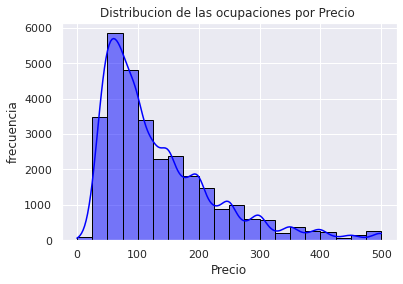

In [15]:
#@title Respuesta Ejercicio 3
#plt.hist(airbnb['price'], color = 'blue', ec ='black')
plt.title('Distribucion de las ocupaciones por Precio ')
plt.xlabel('Precio')
plt.ylabel('frecuencia')
#plt.show();
#airbnb['price'].value_counts().plot(kind = 'hist')
#sns.countplot(airbnb['price'], palette = 'ocean')
#sns.histplot(airbnb['price'],color = 'blue', ec = 'black', palette = 'ocean')
sns.histplot(data =airbnb, x ='price', bins = 20, kde = True, color = 'blue', ec = 'black', palette = 'ocean')







Text(0, 0.5, 'Frecuencia')

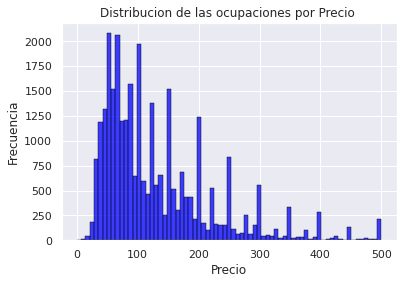

In [16]:
#@title Grafica # 2 Ejercicio 3
sns.histplot(airbnb['price'],color = 'blue', ec = 'black', palette = 'ocean')
plt.title('Distribucion de las ocupaciones por Precio ')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')


In [17]:
airbnb['price'].skew()

1.5057746600270883

In [18]:
airbnb['price'].kurtosis()

2.282103817879283

### Analisis ejercicio 3:
los valores con mayor cantidad frecuencia se encuentra entre los 150 & 200
dolares(Moda). 
La distribucion es asimetrica a la derecha y es unimodal.  el sesgo es positivo ya que la simetria es a la derecha. de acuerdo al contexto de estos datos encontramos valores asimericos.



### Ejercicio 4

Acompañe el análisis del punto anterior con la construcción e interpretación de un boxplot para el precio.

Text(0.5, 0, 'Precio en dolares us$')

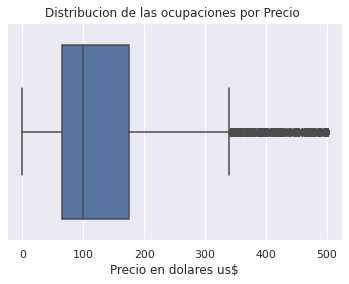

In [19]:
# Respuesta
sns.boxplot(data = airbnb, 
            x = 'price')
plt.title('Distribucion de las ocupaciones por Precio ')
plt.xlabel('Precio en dolares us$')
#plt.ylabel('Precio en dolares')


### Analisis ejercicio 4:

LA DISTRIBUCION DEL PRECIO ES ASIMETRICA A LA DERECHA CON UNA MAYOR CONCENTRACION ENTRE LOS 100 Y LOS 170 US$ DOLARES OSEA LA MEDIA PARA LA MAYORIA DE LAS OCUPACIONES.

### Ejercicio 5

Basado en lo que hemos hecho hasta ahora, analice las variables longitude y latitude. Use los recursos que crea necesarios para analizar de forma univariada estas 2 variables. No olvide discutir los resultados obtenidos.

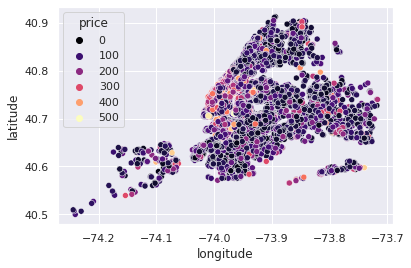

In [33]:
#@title ananlisis de las geolocalizaciones de la ciudad de new york
sns.scatterplot(data=airbnb,
                x = 'longitude',
                y = 'latitude',
                hue = 'price', palette = 'magma')


### Analisis ejercicio 5:
A raiz de este grafico generado donde realizamos el analisis de las variables latitude y longitude "latitud y longitud" que corresponden a los puntos de ubicacion de los hospedajes, podemos concluir que los hospedajes con mayor precio y la gran mayoria se encuentran en el centro de la ciudad de new york (brooklin,queens,manhathan).
 El hospedaje mas costoso se encuentra en el centro de brooklin y a medida que se van alejando del centro de la ciudad los precios van disminuyendo.

In [21]:
airbnb3 = airbnb[["price","latitude","longitude"]]
airbnb3.head()


,price,latitude,longitude
0,149,40.64749,-73.97237
1,150,40.80902,-73.94190
2,190,40.79685,-73.94872
3,60,40.65599,-73.97519
4,80,40.86754,-73.92639


In [22]:
airbnb3[['latitude','longitude']].value_counts()

latitude  longitude
40.72145  -73.97881    2
40.70818  -73.94952    2
40.72741  -74.00178    2
40.76989  -73.94961    2
40.75584  -73.99559    2
                      ..
40.70258  -73.92614    1
40.70255  -73.92103    1
          -73.94408    1
40.70254  -73.83220    1
40.91306  -73.89389    1
Length: 30172, dtype: int64

### Ejercicio 6

Pasemos ahora a analizar las variables cualitativas ¿Cuántos barrios diferentes tiene la variable neighbourhood? 

Haga una gráfica que muestre la cantidad de hospedajes por barrio. Solamente muestre el top 10.





<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* Métodos útiles:
`.nunique(), .unique(), .value_counts(),.sort_values(),head()`
* Obtenga la cantidad de valores únicos y una lista con el nombre de los barrios.
* Obtenga la tabla de frecuencia con la cantidad de hospedajes por barrio. 
* Organicela de mayor a menor a frecuencia.
* Grafique usando el método `.plot()`
* No olvide describir y analizar la visualización obtenida. ¿Todos los barrios tienen la misma cantidad de hospedajes? ¿Cuales son los 3 más importantes?
* ¿Qué porcentaje de los hospedajes están el top 3?

In [24]:
# Respuesta

#airbnb2['#airbnb['price'].nunique()
airbnb['neighbourhood'].value_counts()*100/airbnb.shape[0]



Brooklyn                23.274462
Manhattan               19.954273
Queens                   5.616488
Williamsburg             4.102190
Bedford-Stuyvesant       3.757580
                          ...    
Tottenville              0.003314
Spuyten Duyvil           0.003314
South Street Seaport     0.003314
Castleton Corners        0.003314
Meiers Corners           0.003314
Name: neighbourhood, Length: 186, dtype: float64

In [25]:
#@title ###tabla de frecuencia de valores x barrio.
airbnb['neighbourhood'].value_counts().head(10)

Brooklyn              7024
Manhattan             6022
Queens                1695
Williamsburg          1238
Bedford-Stuyvesant    1134
Harlem                 981
Midtown                859
Bushwick               691
Upper West Side        567
Upper East Side        512
Name: neighbourhood, dtype: int64

In [ ]:

airbnb['neighbourhood'].unique()





In [ ]:
airbnb['neighbourhood'].unique()

Text(0, 0.5, 'CANTIDAD')

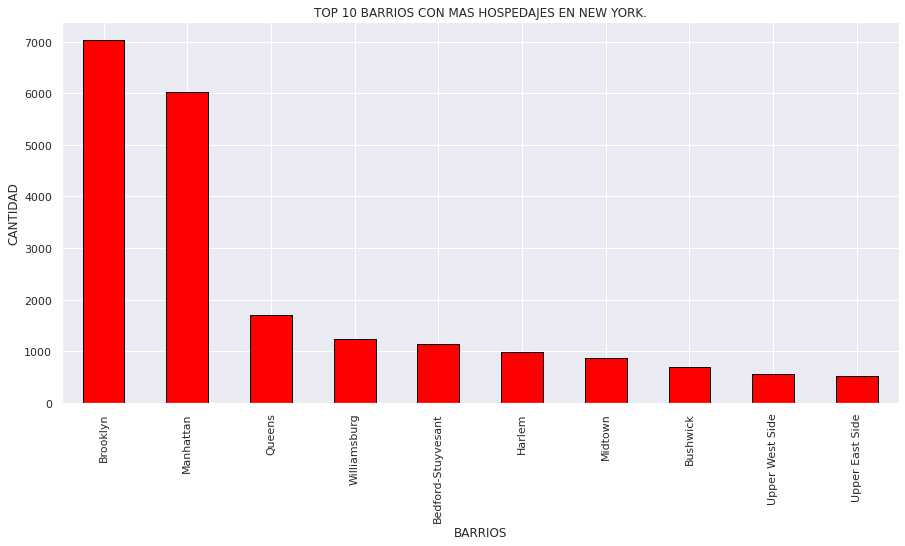

In [28]:
#@title 
#airbnb[['neighbourhood']].sort_values()
#airbnb.groupby('neighbourhood')
#airbnb['neighbourhood'].value_counts(10).plot(kind = 'bar')
airbnb['barrios'] =airbnb['neighbourhood']
airbnb.groupby('barrios')
airbnb['barrios'].value_counts().head(10).plot(kind ='bar',figsize = (15,7), color ='red', ec = 'black')
#airbnb.groupby('barrios')['price'].mean().plot(kind = 'bar', figsize = (20,10))
plt.title('TOP 10 BARRIOS CON MAS HOSPEDAJES EN NEW YORK.')
plt.xlabel('BARRIOS')
plt.ylabel('CANTIDAD')


Respuestas:

La variable **neighbourhood** tiene **186 barrios diferentes**.

No todos los barrios tiene la misma cantidad de hospedajes estas cantidades varian de acuerdo a la ubicacion del barrio.

Los 3 barrios mas importantes son: 
* Brooklin.
* Manhattan.
* Queens.

El porcentace de hospedajes que esta en el top 3 es del **49.21%**


### Ejercicio 7

Superhost (cuya traducción del inglés significa “Super anfitrión”) es una categoría de Airbnb que destaca a los anfitriones más experimentados, hospitalarios y mejor valorados. Estos anfitriones reciben un distintivo especial en su anuncio y su perfil que les otorga una mayor visibilidad en la plataforma.

¿Qué porcentaje de los hospedajes son ofrecidos por un superhost?

<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* value_counts()
* Normalice el conteo y multiplique por 100
* Haga una gráfica

In [29]:
#@title Respuesta
airbnb['host_is_superhost'].value_counts()*100/airbnb.shape[0]
#prueba = airbnb['host_is_superhost'].value_counts()*100/airbnb.shape[0]
#prueba.plot.bar()


0.0    91.616687
1.0     8.353491
Name: host_is_superhost, dtype: float64

Text(0.5, 1.0, '%  de Hospedajes Ofrecidos por Superanfritiones.')

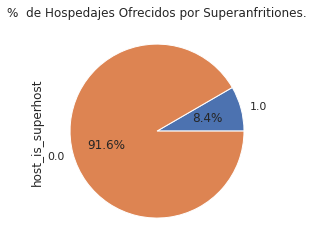

In [30]:
#@title
host = airbnb['host_is_superhost'].value_counts(normalize = True, ascending = True)*100

host.plot.pie(autopct='%1.1f%%')
plt.title('%  de Hospedajes Ofrecidos por Superanfritiones.')




los porcentajes de hospedajes ofrecidos por un superhost corresponde al 8.35%

### Ejercicio 8

Basado en los ejercicios anteriores analice las variable property_type y parking con los recursos que considere necesarios. No olvide analizar y describir sus resultados.

#Analisis ejercicio 8
la variable property_type o "tipo de propiedad" se compone de 33 tipos de  propiedades diferentes de las cuales el 30.2% (9131) tienen parqueadero.

los APARTAMENTOS tiene el mayor porcentaje de tipos de propiedad que tienen parqueadero con el 21.3%, como tambien tiene el mayor porcentaje de ocupaciones sin parqueadero con el 59.9% del total de los tipos de propiedades.

los tipos de propiedades que tiene mas parking son:


* apartamentos, hay en total 24538 propiedades con parqueaderos y sin parqueaderos.
* casas, hay en total 2185 propiedades con parqueaderos y sin parqueaderos.
* condominios, tiene en total 982 propiedades con parqueaderos y sin parqueaderos.
* tonwhouse, que tiene en total 773 propiedades con parqueaderos y sin parqueaderos.
* loft, al igual tiene740 propiedades con parqueaderos y sin parqueaderos.



In [105]:

#@title
airbnb['property_type'].unique()
#airbnb['property_type'].nunique()
#airbnb['parking'].nunique()


array(['Apartment', 'Condominium', 'House', 'Townhouse', 'Boutique hotel',
       'Loft', 'Bed and breakfast', 'Treehouse', 'Cabin',
       'Serviced apartment', 'Earth house', 'Aparthotel', 'Other',
       'Guest suite', 'Villa', 'Hostel', 'Cave', 'Guesthouse', 'Bungalow',
       'Houseboat', 'Castle', 'Resort', 'Tiny house', 'Boat', 'Hotel',
       'Cottage', 'Tent', 'Dome house', 'Farm stay',
       'Casa particular (Cuba)', 'Camper/RV', 'Yurt', 'Barn'],
      dtype=object)

In [82]:
airbnb['parking'].value_counts()

-1    21048
 1     9131
Name: parking, dtype: int64

In [83]:
airbnb['parking'].value_counts()*100/airbnb.shape[0]

-1    69.743862
 1    30.256138
Name: parking, dtype: float64

In [ ]:
#@title
from pandas.core.algorithms import value_counts
from pandas._libs.hashtable import value_count
#airbnb[['property_type','parking']].value_counts()*100/airbnb.shape[0] # esta es
#airbnb['parking'].value_counts()
#airbnb.groupby('parking').agg( { 'property_type': ['count'] }).sort_values(by = 'property_type', ascending = True)
airbnb.groupby('property_type').agg( { 'parking': ['count'] }).sort_values(by = 'property_type')
#airbnb['property_type'].unique()
#airbnb['property_type'].nunique()
#airbnb['parking'].unique()
#airbnb[['property_type','parking']]
#airbnb.groupby('parking')['property_type'].value_counts().plot(kind = 'bar', figsize = (50,15))
#sns.countplot(data =airbnb, x='parking' )
#airbnb[airbnb['parking'] ==1].sort_values(by= 'property_type').head()
#airbnb[airbnb['parking'] ==-1].groupby('property_type').head(5)





## Análisis multivariado

Hasta aquí hemos estado analizando nuestras variables y describiendo las características principales de nuestra población. Ahora vamos a comenzar a buscar relaciones entre nuestras variables, sobretodo con respecto al precio, recuerde que esta es nuestra variable objetivo.


### Ejercicio 9

Construya una gráfica que muestre el mínimo, máximo, media y mediana del precio para las hospedajes con Superhost y sin Superhost.

¿Existe alguna relación entre el precio y ser un *Superhost*? Justifique su respuesta.

Recuerde describir y discutir sus resultados. 


<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* agrupe los datos usando `.groupby()` 
* Use el método `.agg()` para calcular las descriptivas de la variable precio
* Grafique con el método `.plot`  
* Puede construir también un boxplot.



Text(0, 0.5, 'precio')

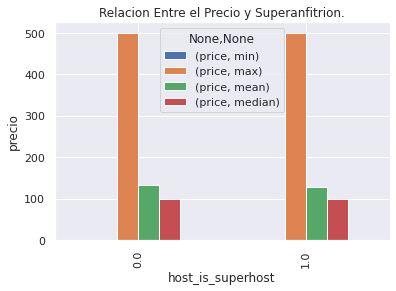

In [20]:
#@title Respuesta
#airbnb.groupby('property_type').agg( { 'parking': ['count'] }).sort_values(by = 'property_type')
airbnb.groupby('host_is_superhost').agg( { 'price': ['min','max','mean','median'] }).plot(kind = 'bar')
plt.title('Relacion Entre el Precio y Superanfitrion.')
#plt.xlabel('BARRIOS')
plt.ylabel('precio')



No vemos que se encuentre una relacion entre ser superhost y el precio. ya que el precio promedio(media),se encuentran igualmente en ambas consideraciones si son o no superhost, en este caso lo que hamos analizado en las diferentes graficas es que el precion no hace que seas un superhost esta mas bien definido por el numero de reviews que tenga cada cliente.

### Ejercicio 10

Para complementar el punto anterior, construya un boxplot para evaluar la siguiente pregunta. 

¿Existe alguna relación entre el precio y ser un *Superhost*? Justifique su respuesta.

Text(0.5, 1.0, 'RELACION ENTRE EL PRECIO Y SER SUPERHOST.')

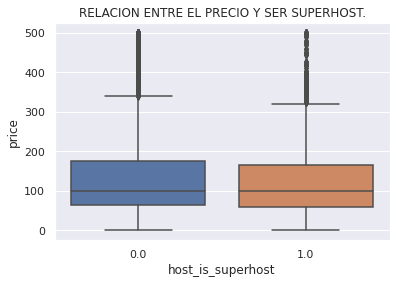

In [21]:
#@
sns.boxplot(data = airbnb,
           y = 'price',
           x = 'host_is_superhost')
plt.title('RELACION ENTRE EL PRECIO Y SER SUPERHOST.')



## Ejemplo 1: Análisis del precio en función del tipo de propiedad

Analicemos ahora la relación entre el tipo de propiedad y el precio usando un boxplot.


In [37]:
# Para darle orden a la gráfica vamos a organizar los tipos de propiedades de menor mayor mediana

median_order = (airbnb.groupby('property_type') # agrupar por tipo de propiedad
['price'].                                      # filtrar el precio en cada grupo
median().                                       # calcular la mediana
sort_values().                 # organizar 
index)

median_order

Index(['Hostel', 'Treehouse', 'Earth house', 'Dome house', 'Castle', 'Villa',
       'House', 'Guesthouse', 'Tiny house', 'Farm stay', 'Townhouse', 'Barn',
       'Casa particular (Cuba)', 'Bed and breakfast', 'Guest suite', 'Hotel',
       'Apartment', 'Camper/RV', 'Cabin', 'Other', 'Yurt', 'Bungalow', 'Loft',
       'Condominium', 'Houseboat', 'Cave', 'Cottage', 'Tent', 'Boutique hotel',
       'Serviced apartment', 'Boat', 'Aparthotel', 'Resort'],
      dtype='object', name='property_type')

Text(0.5, 1.0, 'Precio del hospedaje en función del tipo de propiedad')

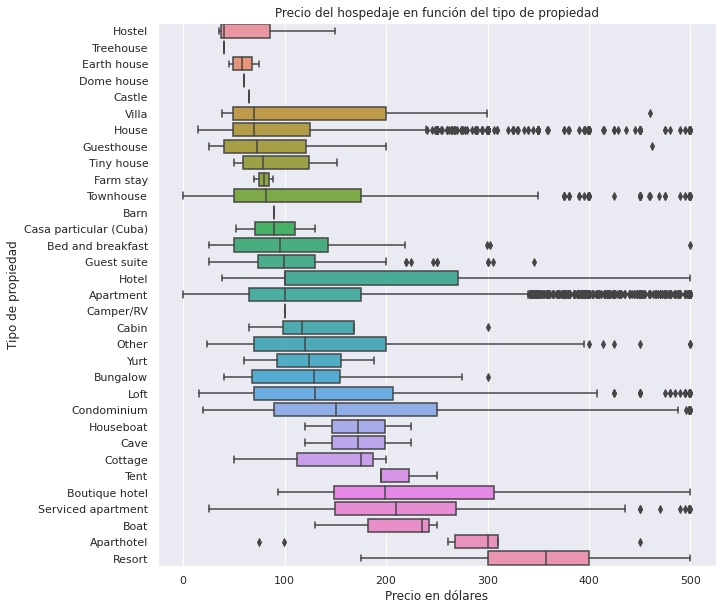

In [38]:
fig = plt.figure(figsize = (10,10) ) # se crea la figura y se determina el tamaño

sns.boxplot(data = airbnb, 
            y = 'property_type', 
            x = 'price',
            order = median_order ) # ordenamiento de mayor a menor frecuencia

plt.xlabel('Precio en dólares')
plt.ylabel('Tipo de propiedad')
plt.title('Precio del hospedaje en función del tipo de propiedad')

Debido a la cantidad tan grande de tipos de propiedad, la gráfica anterior carece de valor y es demasiado compleja. Vamos a crear un subconjunto de datos solamente con los 5 tipos de propiedades que tienen mayor frecuencia. En el proceso no perderemos demasiados datos, ya que, el 96% de los hospedajes pertenecen a estas 5 categorías.


In [39]:
# Primero, encontramos cuales son los 5 tipos de propiedades más comunes

airbnb['property_type'].value_counts(normalize = True).head(5)*100

Apartment      81.308194
House           7.041320
Condominium     3.253918
Townhouse       2.558070
Loft            2.452036
Name: property_type, dtype: float64

In [40]:
# Extraemos el índice que contiene el nombre de las categorías de interés

top5_properties = (airbnb['property_type'].value_counts(normalize = True).head(5)*100).index
top5_properties

Index(['Apartment', 'House', 'Condominium', 'Townhouse', 'Loft'], dtype='object')

`.isin()` nos permite encontrar todas las coincidencias existentes sobre una lista u objeto iterable. En este caso nos permite encontrar todos los hospedajes que pertenezcan a nuestro top 5 de tipos de propiedades. Para más información sobre este método consulte [aquí](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html).



In [41]:
#@title Creamos un filtro con el método isin()

top = airbnb.loc[airbnb['property_type'].isin (top5_properties)]
top.head()

,id,name,transit,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable,barrios
0,2539,Clean & quiet apt home by the park,Very close to F and G trains and Express bus i...,2787,39698.0,within an hour,1.0,0.0,6.0,1.0,"Brooklyn , NY, United States",Brooklyn,40.64749,-73.97237,Apartment,Private room,2,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",149,1,35,1,3 weeks ago,1,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,6,0,5,1,0.21,1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,1,1,Brooklyn
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,4632,39777.0,within a day,1.0,0.0,1.0,1.0,"New York, NY, United States",Harlem,40.80902,-73.94190,Apartment,Private room,2,1.0,1,1,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",150,2,20,3,34 months ago,1,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,1,0,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,Harlem
2,7750,Huge 2 BR Upper East Cental Park,NaN,17985,39953.0,within a day,1.0,0.0,2.0,1.0,"New York, NY, United States",Harlem,40.79685,-73.94872,Apartment,Entire home/apt,4,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",190,1,0,7,7 weeks ago,1,4,14,14,249,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,2,1,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,Harlem
3,8505,Sunny Bedroom Across Prospect Park,Ten minutes walk to the 15th sheet F&G train s...,25326,40006.0,within an hour,1.0,1.0,2.0,0.0,"Brooklyn, NY, United States",Brooklyn,40.65599,-73.97519,Condominium,Private room,2,1.0,1,1,Real Bed,"{Wifi,""Air conditioning"",""Free street parking""...",60,1,20,1,2 months ago,1,25,55,85,85,19,17,97.0,10.0,10.0,10.0,10.0,10.0,9.0,0,moderate,2,1,1,0,1.37,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,Brooklyn
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Metro 1 et A,26394,40014.0,NaN,NaN,0.0,1.0,1.0,"New York, NY, United States",Manhattan,40.86754,-73.92639,Apartment,Private room,2,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",80,1,20,4,14 months ago,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,moderate,1,0,1,0,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,1,1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,Manhattan


In [42]:
# Creamos una lista con las 5 propiedades ordenadas de mayor a menor mediana

median_order_top = (top.groupby('property_type')
['price']
.median()
.sort_values(ascending= False)
.index)

median_order_top

Index(['Condominium', 'Loft', 'Apartment', 'Townhouse', 'House'], dtype='object', name='property_type')

Text(0.5, 1.0, 'Precio del hospedaje en función del tipo de propiedad')

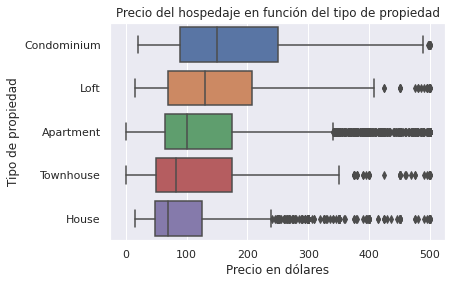

In [43]:
# Finalmente construimos la gráfica solicitada con el nuevo subconjunto top

sns.boxplot(data = top, 
            y = 'property_type', 
            x = 'price',
            order = median_order_top) # las organizamos de acuerdo al top 5 obtenido anteriormente

plt.xlabel('Precio en dólares')
plt.ylabel('Tipo de propiedad')
plt.title('Precio del hospedaje en función del tipo de propiedad')

En la anterior visualización podemos observar una alta dispersión para  todas las categorías. Todas las distribuciones son asimétricas hacía la derecha, la asimetría es ocasionada por propiedades con precios mayores a la media en cada caso. Comparando las medianas podemos observar que en general los condominios son los tipos de propiedad más costosos seguido por los lofts y los apartamentos. 

**Conclusión: Se observa una distribución de precios ligeramente diferente para cada tipo de propiedad. Los precios sí se ven afectados por el tipo de propiedad, sin embargo, solamente esta variable no permite explicar el comportamiento del precio.**

Nota: Observe que en la gráfica general hay tipos de propiedades con mayor precio promedio que los condominios y menor precio que las casas, discuta al respecto.

### Ejercicio 11  (Díficil)

Repita el análisis que acabamos de hacer en el ejemplo anterior con el tipo de propiedad y su relación con el precio, pero ahora responda: **¿Existe una relación entre el barrio y el precio por noche del Airbnb?**

In [4]:
#@title Respuesta:
# Para darle orden a la gráfica vamos a organizar los barrios de menor mayor mediana

median_order = (airbnb.groupby('neighbourhood') # agrupar por barrio
['price'].                                      # filtrar el precio en cada grupo
median().                                       # calcular la mediana
sort_values().                 # organizar 
index)

median_order



Index(['Concord', 'Grasmere', 'Van Nest', 'Hunts Point', 'Fordham',
       'Westerleigh', 'New Brighton', 'Tremont', 'Marble Hill',
       'Castleton Corners',
       ...
       'DUMBO', 'Nolita', 'Midtown East', 'West Village', 'Chelsea',
       'Murray Hill', 'Financial District', 'Flatiron District', 'Noho',
       'Tribeca'],
      dtype='object', name='neighbourhood', length=186)

Text(0.5, 1.0, 'Precio del hospedaje por barrio')

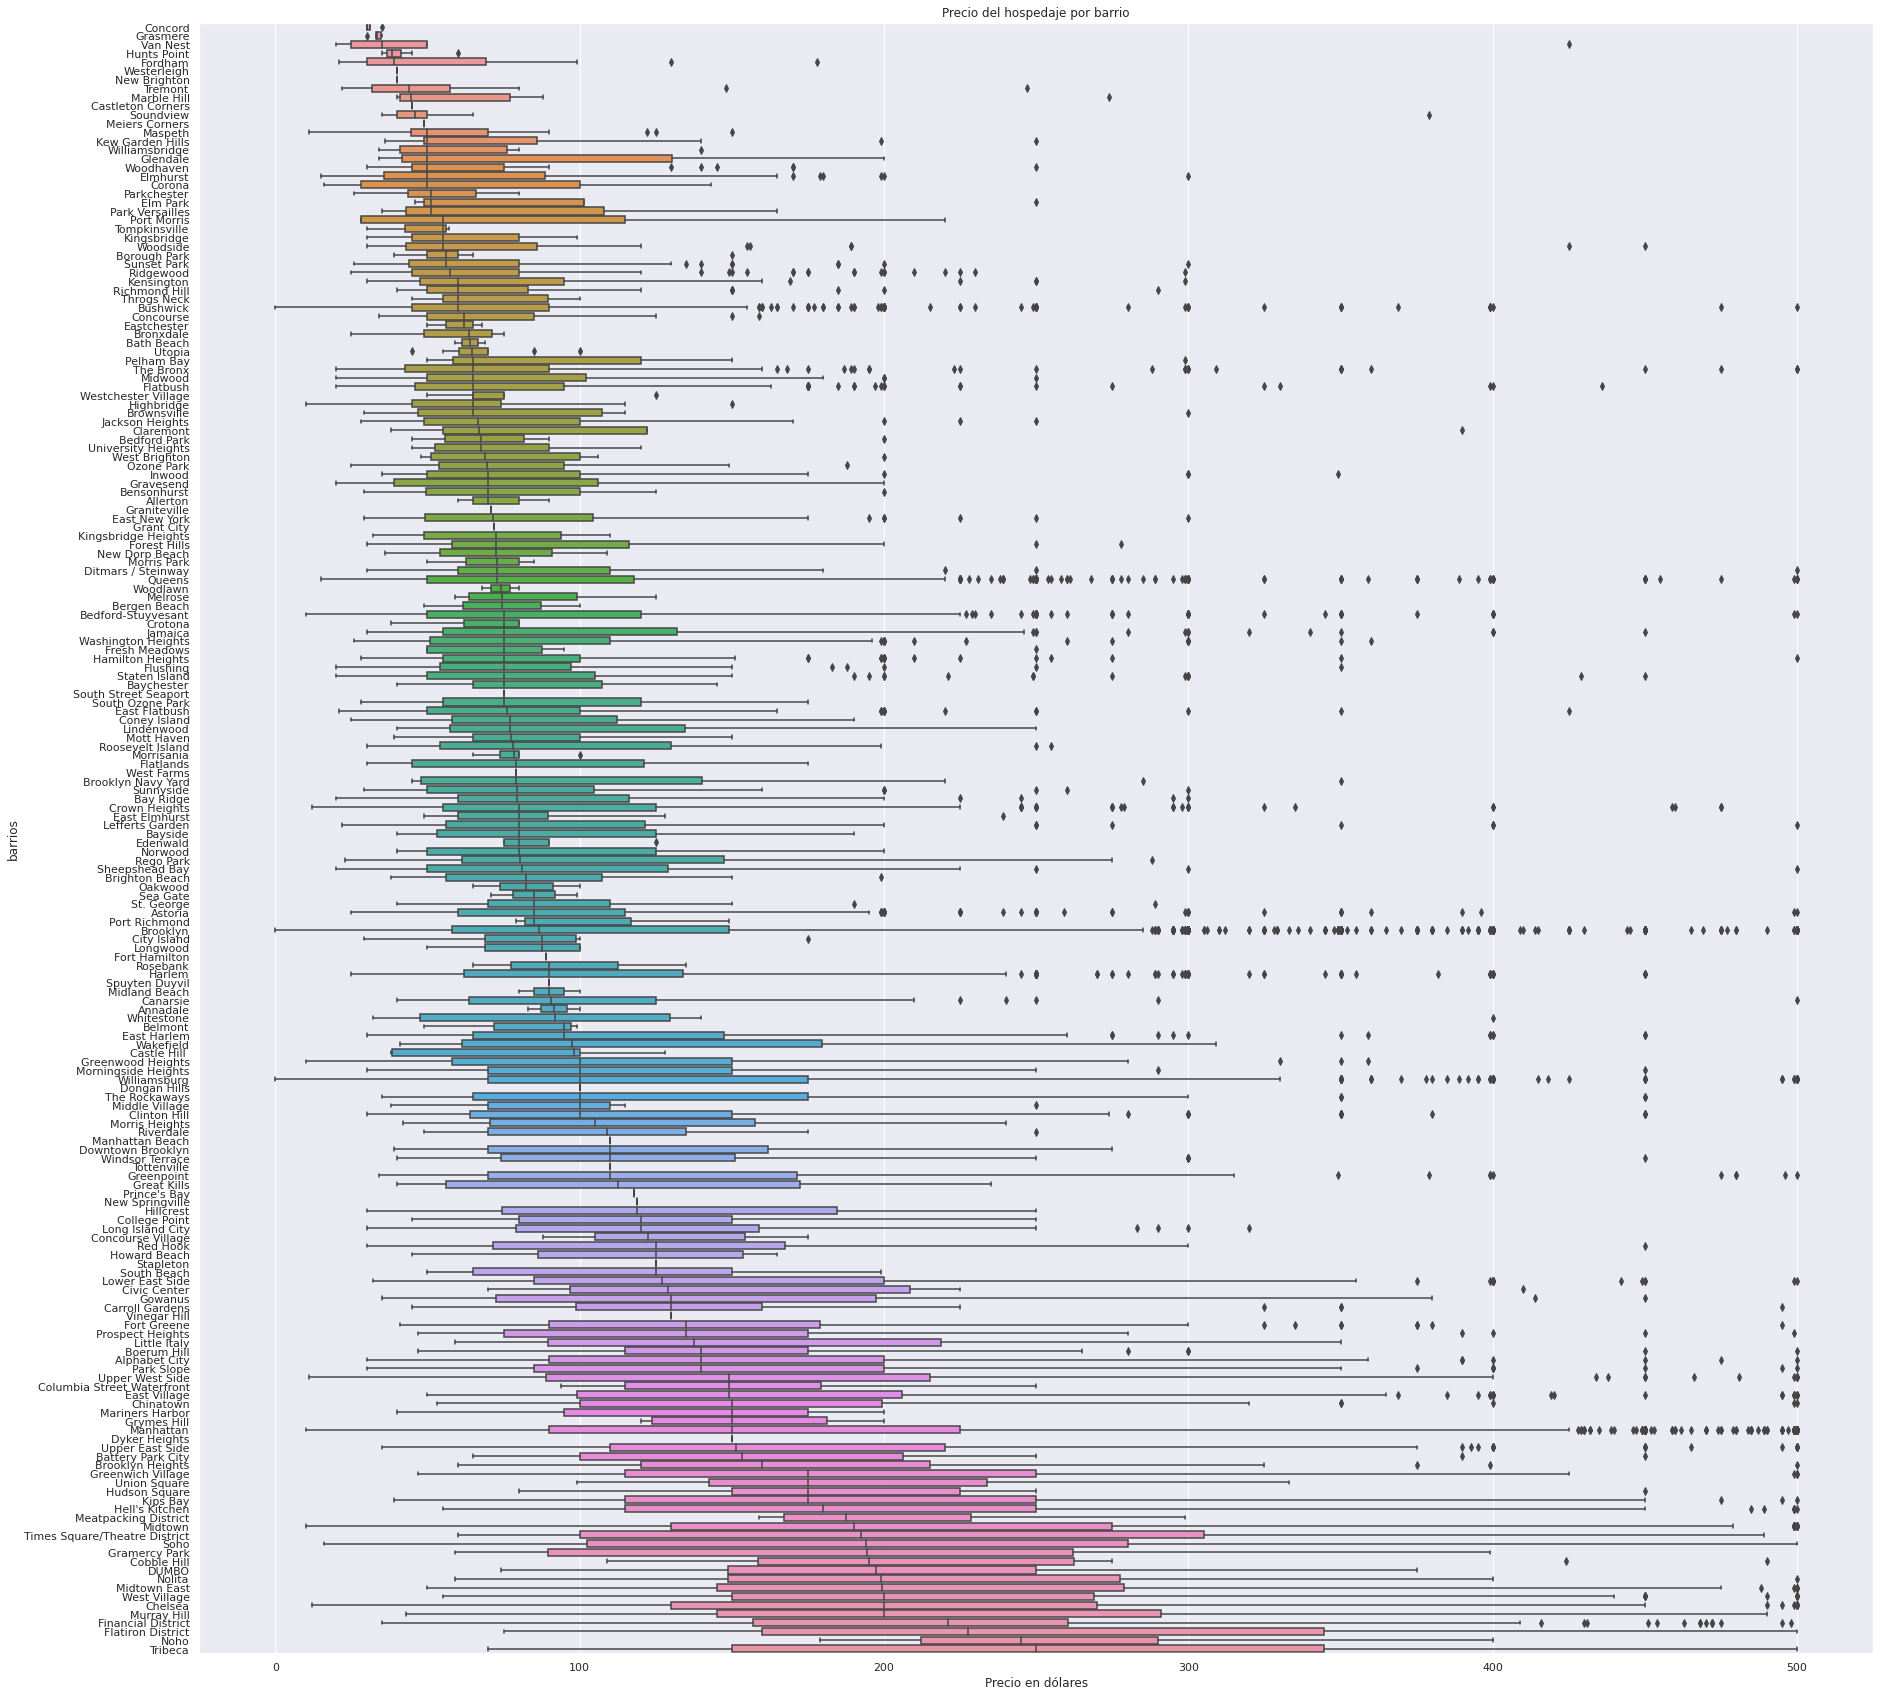

In [17]:
#@title Se crea el boxplot:
fig = plt.figure(figsize = (30,30) ) # se crea la figura y se determina el tamaño

sns.boxplot(data = airbnb, 
            y = 'neighbourhood', 
            x = 'price',
            order = median_order ) # ordenamiento de mayor a menor frecuencia

plt.xlabel('Precio en dólares')
plt.ylabel('barrios')
plt.title('Precio del hospedaje por barrio')

In [8]:
# Sacamos los 5 barrios mas frecuentados

airbnb['neighbourhood'].value_counts(normalize = True).head(5)*100

Brooklyn              23.281405
Manhattan             19.960225
Queens                 5.618164
Williamsburg           4.103414
Bedford-Stuyvesant     3.758701
Name: neighbourhood, dtype: float64

In [18]:

top5_properties = (airbnb['neighbourhood'].value_counts(normalize = True).head(5)*100).index
top5_properties

Index(['Brooklyn', 'Manhattan', 'Queens', 'Williamsburg',
       'Bedford-Stuyvesant'],
      dtype='object')

In [ ]:
top = airbnb.loc[airbnb['neighbourhood'].isin (top5_properties)]
top.head()

In [11]:
median_order_top = (top.groupby('neighbourhood')
['price']
.median()
.sort_values(ascending= False)
.index)

median_order_top

Index(['Manhattan', 'Williamsburg', 'Brooklyn', 'Bedford-Stuyvesant',
       'Queens'],
      dtype='object', name='neighbourhood')

Text(0.5, 1.0, 'Precio del hospedaje en función del tipo de propiedad')

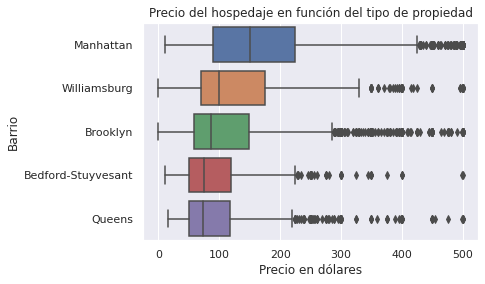

In [13]:
sns.boxplot(data = top, 
            y = 'neighbourhood', 
            x = 'price',
            order = median_order_top) # las organizamos de acuerdo al top 5 obtenido anteriormente

plt.xlabel('Precio en dólares')
plt.ylabel('Barrios')
plt.title('Precio promedio por noche segun los barrios mas top')

En la anterior grafica la mayoria de las distribuciones son asimétricas hacía la derecha, la asimetría es ocasionada por barrios con precios mayores a la media en los barrios top de la grafica. Comparando los precios promedios  por noche podemos ver que en general que el barriode manhathan se encuentran lños precios más costosos seguido por Willoiamsburg y brooklin. 

Los precios sí se ven afectados por el tipo de  barrio en donde se hospeden, esta variable podria ser una de las que pueda explicar el comportamiento de los precios de acuerdo a la ubicacion.

### Ejercicio 12

Construya un boxplot entre la variable parqueadero y precio.

¿Existe alguna relación entre si un Airbnb tiene parqueadero y su precio?

Text(0.5, 1.0, 'relacion entre el precio y si tiene parking')

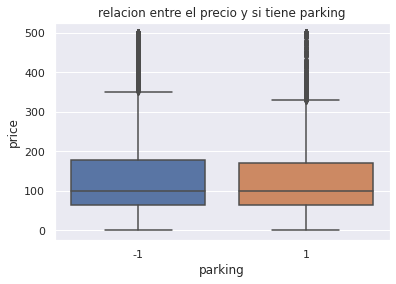

In [22]:
# Respuesta
sns.boxplot(data = airbnb,
           y = 'price',
           x = 'parking')
plt.title('relacion entre el precio y si tiene parking')




En la grafica podemos analizar que una propiedad no varia el precio promedio(media) si este tiene o no tiene parqueadero, esta variable de por si no es el determinate del valor del precio de la de la propiedad.

### Ejercicio 13

Construya una gráfica de dispersión de longitud y latitud. Longitud debe ir en el eje horizontal y latitud en el eje vertical. Para más información consulte [aquí](https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Latitud_y_Longitud_en_la_Tierra.svg/1920px-Latitud_y_Longitud_en_la_Tierra.svg.png).


¿Encuentra algunos patrones? ¿Los hospedajes se distribuyen de forma homogénea en la ciudad de Nueva York?

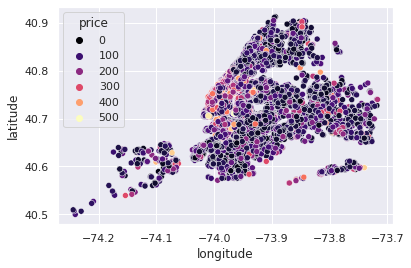

In [116]:
# Respuesta
#@title analisis de las geolocalizaciones de la ciudad de new york
sns.scatterplot(data=airbnb,
                y = 'latitude',
                x = 'longitude',
                hue = 'price', palette = 'magma')



En esta grafica podemos determinar una distribucion homogenea en los 5 principales barrios de new york concentrando la mayoria en esos 5 barrios principales(Brooklyn,Manhattan,Queens,Williamsburg',Bedford-Stuyvesant,etc.) adicinalmente vemos la mayor concentracion de precios altos en esta area del mapa.

## Ejemplo 2: Uso de jointplot para evaluar puntos con alta concentración de hospedajes

En la visualización anterior pudimos observar algunos patrones de distribución de los hospedajes, sin embargo, por la gran cantidad de puntos no es posible analizar qué zonas tienen mayor cantidad de hospedajes. Vamos a ver un nuevo tipo de visualización que nos ayudará en ese análisis. La visualización jointplot nos va permitir visualizar al tiempo la distribución de cada variable por separado y adicionalmente veremos dónde hay mayor concentración de puntos usando un mapa de calor.

Para más información de este tipo de visualización consulte [aquí](https://seaborn.pydata.org/generated/seaborn.jointplot.html).

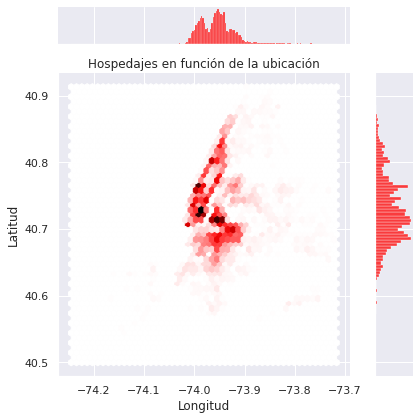

In [8]:
sns.jointplot(data = airbnb,
              x='longitude', 
              y='latitude', 
              kind="hex", # define la forma de las zonas que vamos a construir
              color = 'red')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Hospedajes en función de la ubicación')
plt.tight_layout() # Evita el sobrelapamiento de elementos

Podemos obsevar una clara concentración de hospedajes en la zona de Manhattan y Brooklyn al sur del Central Park. Alrededor de del Central Park también se puede ver una alta cantidad de hospedajes. Esto se debe principalmente a que es una zona central, turística y prestigiosa de la ciudad.  Más adelante construiremos esta misma gráfica pero sobre el mapa de la ciudad de Nueva York.

<img src = "https://origin-www.nycgo.com/images/pages/71068/neighbs_socialshare_1200x628_fiveboros__facebook.png" alt = "Encabezado" width = "50%">  </img>

### Ejercicio 14

Utilice un jointplot para analizar la relación entre el número de reseñas (reviews) y el precio.
¿Existe una relación entre el precio y el número de reseñas?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  # This is added back by InteractiveShellApp.init_path()


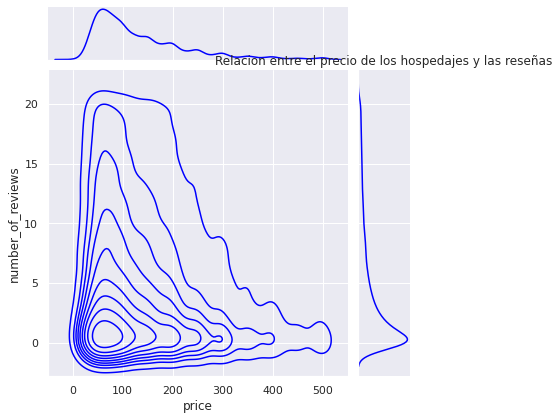

In [14]:
# Respuesta
sns.jointplot(data = airbnb,
              x='price', 
              y='number_of_reviews', 
              kind="kde", # define la forma de las zonas que vamos a construir
              color = 'blue')

plt.xlabel('numero de reseñas')
plt.ylabel('precio')
plt.title('Relacion entre el precio de los hospedajes y las reseñas')
plt.tight_layout() # Evita el sobrelapamiento de elementos

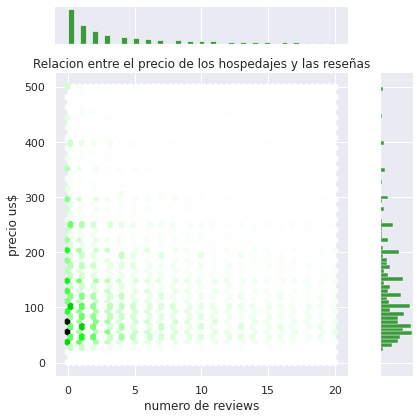

In [15]:
sns.jointplot(data = airbnb,
              x='number_of_reviews', 
              y='price', 
              kind="hex", # define la forma de las zonas que vamos a construir
              color = 'green')

plt.xlabel('numero de reviews')
plt.ylabel('precio us$')
plt.title('Relacion entre el precio de los hospedajes y las reseñas')
plt.tight_layout() # Evita el sobrelapamiento de elementos

* Respuesta:

Segun podemos analizar en ambas graficas si existe una relacion entre el precio y el numero de reseñas, ya que la mayor cantidad de estas se encuentra en el precio promedio o precio medio que esta entre 100 y 150 dolares al igual que en todas las geraficas anteriores el precio es un factor determinante en casi la mayoria de las variables que hemos analizado anteriormente.
a mayor precio menor la cantidad de reseñas esto se podria analizar como la utilizacion de los tipos de hospedajes que son los apartamentos con la mayoria de hospedajes ,mas reviews yson los mas superhost. 

### Ejercicio 15

¿Existe alguna relación entre los Superhosts y el número de reseñas?

Puede emplear un diagrama de barras o un boxplot para responder esta pregunta. No olvide discutir el resultado.

Text(0.5, 1.0, 'Relacion entre los superhost y el # de reseñas')

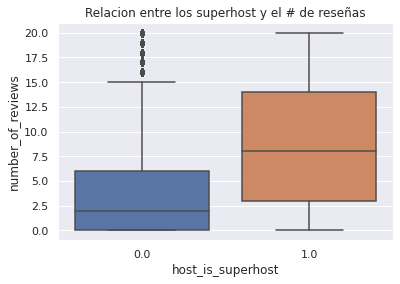

In [15]:
# Respuesta
sns.boxplot(data = airbnb,
           y = 'number_of_reviews',
           x = 'host_is_superhost')
plt.title('Relacion entre los superhost y el # de reseñas')




A diferencia de analisis anteriores en la grafica donde analizamos si ser superhost y el precio que es la variable en cuestion no afecta el precio, el numero de reseñas si influye se que te conviertas en un superhost, a mayor numero de reseñas puedes convertirte en superhost y por ende esto influye en convertirse en este tipo de propietario.

## Ejemplo 3: Creación de un geoheatmap con Folium

Vamos a trabajar con una herramientas de visualización de mapas interactivos. La librería se se llama folium. Instalamos la librería usando el gestor de paquetes pip. También importamos los módulos necesarios para crear nuestra visualización. Para más información de la librería folium consulte la [Documentación](https://python-visualization.github.io/folium/).

In [23]:
!pip install -U folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import folium 
from folium.plugins import HeatMap

In [52]:
map = folium.Map()
map

Podemos ubicar el mapa donde queramos, solo necesitamos las coordenadas del lugar. Por ejemplo, situemos nuestro mapa en la Plaza de Bolívar en Bogotá. Las coordenadas fueron obtenidas usando Google Maps. 
La estructura de las coordenadas es la siguiente:
```
[Latitud, Longitud]
```



In [119]:
plaza_bolivar = [4.598464,-74.076184] # Coordenas de la plaza de Bolívar

map = folium.Map(location = plaza_bolivar,
                 zoom_start= 20, # Zoom inicial, valor más grande, mayo zoom
                 tiles="OpenStreetMap")
map

Luego de esa prueba interesante, ahora sí, construyamos el mapa de Nueva York con las coordenadas respectivas, vamos a centrar el mapa en Central Park.

In [26]:
nueva_york = [40.781027,-73.965726]
map1 = folium.Map(location = nueva_york, zoom_start= 10,tiles="OpenStreetMap")
map1

Ahora necesitamos entregarle a Folium un contenedor de los datos de latitud y longitud. Para eso usamos la función zip que convierte dos objetos iterables y une los elementos en tuplas. Para más información consulte [aquí](https://ellibrodepython.com/zip-python).

In [27]:
data = list(zip(airbnb['latitude'], 
                airbnb['longitude']))

data[0:10]

[(40.64749, -73.97237),
 (40.80902, -73.9419),
 (40.79685, -73.94872),
 (40.65599, -73.97519),
 (40.86754, -73.92639),
 (40.63702, -73.96327),
 (40.66278, -73.97966),
 (40.65944, -73.96238),
 (40.68554, -73.9409),
 (40.73961, -73.98074)]

Ahora vamos a crear la capa del mapa de calor usando un plugin de Folium llamada HeatMap. A este le pasamos los datos y algunos parámetros para ajustar el color. Es importante que la librería Folium esté actualizada para que el mapa sea reproducible. 

In [56]:
hm_loc = HeatMap(data,
              min_opacity = 0.2,
              radius = 8,
              blur = 6)

In [57]:
# Ahora añadimos la capa al mapa que ya habíamos creado

map1.add_child(hm_loc)
map1

El mapa de calor anterior nos está mostrando en que zonas de la ciudad hay una mayor densidad de hospedajes.

In [28]:
# Podemos guardar el mapa como un archivo html interactivo

map1.save("heat_map_density.html")

### Ejercicio 16

Discuta y analice lo que observa en el mapa de calor que acabamos de crear.

En el mapa de calor anterior lo que podemos observar y analizar es que esta grafica nos confirma tolo los analisis que hemos venido presentando anteriormente(boxplot,histogramas,jotploint,etc.) en el cual los hospedajes de mayor precio,mas reviews,superhost y de mayor concentracion se encuentra en el area antes descrita, los barrios de manhathan y Brooklin.

Respuesta

## Ejemplo 3: Creación de un geoheatmap con Folium

Ahora vamos a crear un mapa de calor que nos muestre en que zonas de la ciudad están los hospedajes más costosos.

In [29]:
nueva_york = [40.781027,-73.965726]
map2 = folium.Map(location = nueva_york, zoom_start= 10,tiles="OpenStreetMap")
data2 = list(zip(airbnb['latitude'], 
                airbnb['longitude'],
                airbnb['price'])) # Note que pasamos una tercera columna que es el precio

data2[0:10]

[(40.64749, -73.97237, 149),
 (40.80902, -73.9419, 150),
 (40.79685, -73.94872, 190),
 (40.65599, -73.97519, 60),
 (40.86754, -73.92639, 80),
 (40.63702, -73.96327, 150),
 (40.66278, -73.97966, 120),
 (40.65944, -73.96238, 150),
 (40.68554, -73.9409, 115),
 (40.73961, -73.98074, 200)]

In [60]:
hm_price = HeatMap(data2,
              min_opacity = 0.2,
              radius = 8,
              blur = 6)

map2.add_child(hm_price)
map2

In [61]:
map2.save("heat_map_density.html")

### Ejercicio 17

Haga un análisis del mapa que acabamos de crear.

En el mapa de calor podemos analizar que las propiedades de airbnb mas costosas o de mayor precio que tiene para hospedar en la ciudad de New York es en las calles de wall street donde se encuentra la bolsa de New york y que es el centro financiero de la ciudad, y broadway que es el centro cultural principal de la ciudad donde se encuentran los mas famosos teatros. esto repercute en que los costos de hospedajes sean los mas elevados de la ciudad.

### Ejercicio 18

Escriba sus conclusiones del análisis de datos realizado. Recuerde que las conclusiones deben ser números, estadísticos, información que sale del análisis, no es un resumen de lo aprendido, ni una observación personal acerca del trabajo realizado, ¿qué comportamiento muestran los datos? ¿cuales fueron las respuestas a las preguntas de negocio? ¿cuales considera hasta ahora las variables más importantes respecto a su relación con el precio?
¿Encontró errores en los datos, atípicos? **Las conclusiones son parte fundamental de un informe y/o trabajo investigativo.**

### **CONCLUSIONES**:

* El valor Maximo de una ocupacion es: us$ 500

* El precio promedio de una ocupacion en **New York** es de:  **$132.94** Dolares


NEW YORK tiene en airbnb registrado 186 barrios diferentes.

los 3 barrios mas importantes son:

* Brooklin con 7024 hospedajes para un total de 23.2%

* Manhattan con 6022 hospedajes para un total de 19.95%

* Queens con un total de 1695 hospedajes que corresponde al 5.6%

El porcentaje de los 3 barrios mas importantes corresponde al 49.21% del total de los hospedajes de New York.

las propiedades mas comunes de airbnb en new york son:

* Apartment      81.30%

* House           7.0%

* Condominium     3.2%

* Townhouse       2.5%

* Loft            2.4%

El 83.82% tienen 1 solo baño.

De el total de las ocupaciones de airbnb en new york el 30.25% tienen parqueadero.  

Eso corresponde a un total de 9031 hospedajes. De los cuales el 8.35% son Superhost y el 91.61% no lo son.










Respuesta

**Aquí termina esta primera fase de exploración, en la siguiente trabajaremos en algo de limpieza, creación de nuevas variables y complementar nuestro análisis exploratorio preliminar. Siéntase libre de añadir abajo de esta celda cualquier otra pregunta de negocio, código relacionado u observaciones relevantes.**

## **Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*

## **Desarrollado por:**
---

**Estudiante:** Luis Fernando Lopez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*

In [34]:
!jupyter nbconvert -- to html /content/Copia_de_Fase_1_Precios_de_Airbnb_en_la_ciudad_de_New_York_Estudiantes.ipynb 

[NbConvertApp] WARNING | pattern 'to' matched no files
[NbConvertApp] WARNING | pattern 'html' matched no files
[NbConvertApp] Converting notebook /content/Copia_de_Fase_1_Precios_de_Airbnb_en_la_ciudad_de_New_York_Estudiantes.ipynb to html
[NbConvertApp] Writing 3236382 bytes to /content/Copia_de_Fase_1_Precios_de_Airbnb_en_la_ciudad_de_New_York_Estudiantes.html


In [32]:
!jupyter nbconvert -- to pdf /content/Copia_de_Fase_1_Precios_de_Airbnb_en_la_ciudad_de_New_York_Estudiantes.ipynb 

[NbConvertApp] WARNING | pattern 'to' matched no files
[NbConvertApp] WARNING | pattern 'pdf' matched no files
[NbConvertApp] Converting notebook /content/Copia_de_Fase_1_Precios_de_Airbnb_en_la_ciudad_de_New_York_Estudiantes.ipynb to html
[NbConvertApp] Writing 3236382 bytes to /content/Copia_de_Fase_1_Precios_de_Airbnb_en_la_ciudad_de_New_York_Estudiantes.html
